In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install mysql-connector-python

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv' , 'order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'D:\Ecommerce'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()




Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [4]:
db=mysql.connector.connect(host="localhost",
                           username="root",
                           password="12345",
                           database="ecommerce")

cur = db.cursor()

# List all unique cities where customers are located

In [5]:
query="""select distinct customer_city from customers """
cur.execute(query)
data=cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

# Count the number of orders placed in 2017

In [6]:
query="""select count(order_id) from orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
data[0][0]

225505

# Find the total sales per category

In [7]:
query=""" select products.product_category category, round(sum(payments.payment_value),2) sales from products join 
order_items 
on products.product_id = order_items.product_id
join payments
on payments.order_id=order_items.order_id
group by category"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Category" , "Sales"])
df

,Category,Sales
0,perfumery,13681943.82
1,Furniture Decoration,38614762.58
2,telephony,13145815.37
3,bed table bath,46238949.12
4,automotive,23011946.94
...,...,...
69,cds music dvds,32384.61
70,La Cuisine,78665.31
71,Fashion Children's Clothing,21213.09
72,PC Gamer,58709.61


# Calculate the percentage of orders that were paid in installments.

In [8]:
query="""select (sum(case when payment_installments>=1 then 1 else 0 end))/count(*)*100 from payments"""
cur.execute(query)
data=cur.fetchall()
data

[(Decimal('99.9981'),)]

# Count the number of customers from each state

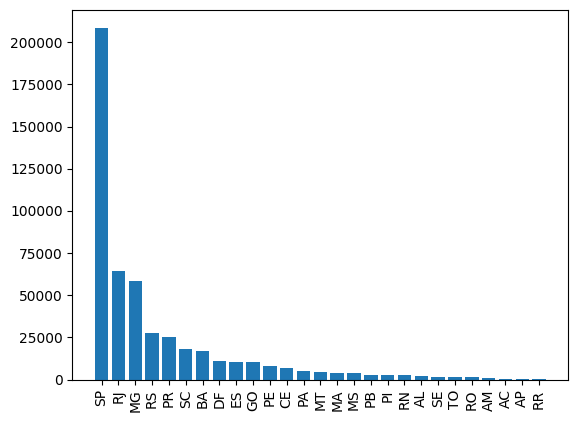

In [9]:
query="""select customer_state , count(customer_id)
from customers group by customer_state"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data , columns=["state" , "customer_count"])
df=df.sort_values(by="customer_count" , ascending=False)
plt.bar(df["state"],df["customer_count"])
plt.xticks(rotation=90)
plt.show()

# Count the number of orders per month in 2018

In [10]:
query="""select monthname(order_purchase_timestamp) months , count(order_id)
from orders where year(order_purchase_timestamp)=2018
group by months"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1
0,July,31460
1,August,32560
2,February,33640
3,June,30835
4,March,36055
5,January,36345
6,May,34365
7,April,34695
8,September,80
9,October,20


# Find the average number of products per order , grouped by customer city

In [11]:
query="""with count_per_order as(select orders.order_id , orders.customer_id , count(order_items.order_id) as oc
from orders join order_items
on orders.order_id=order_items.order_id
group by orders.order_id , orders.customer_id)

select customers.customer_city , round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id=count_per_order.customer_id
group by customers.customer_city"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data , columns=["Customer city" , "Average products per orders"])
df

,Customer city,Average products per orders
0,treze tilias,19.09
1,indaial,16.73
2,sao jose dos campos,17.08
3,sao paulo,17.34
4,porto alegre,17.62
...,...,...
4105,guairaca,30.00
4106,sambaiba,15.00
4107,japaratuba,15.00
4108,tuiuti,15.00


# Calculate the percentage of total revenue contributed by each product category

In [12]:
query="""select upper(products.product_category) category , (sum(payments.payment_value)/(select sum(payment_value) from payments))*100 sales
from products join order_items on products.product_id = order_items.product_id join payments
on payments.order_id=order_items.order_id group by category order by sales desc"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1
0,BED TABLE BATH,96.277757
1,HEALTH BEAUTY,93.175571
2,COMPUTER ACCESSORIES,89.125417
3,FURNITURE DECORATION,80.402838
4,WATCHES PRESENT,80.348884
...,...,...
69,PC GAMER,0.122244
70,HOUSE COMFORT 2,0.096165
71,CDS MUSIC DVDS,0.067431
72,FASHION CHILDREN'S CLOTHING,0.044169


# Identify the top 3 customers who spent the most money in each year.

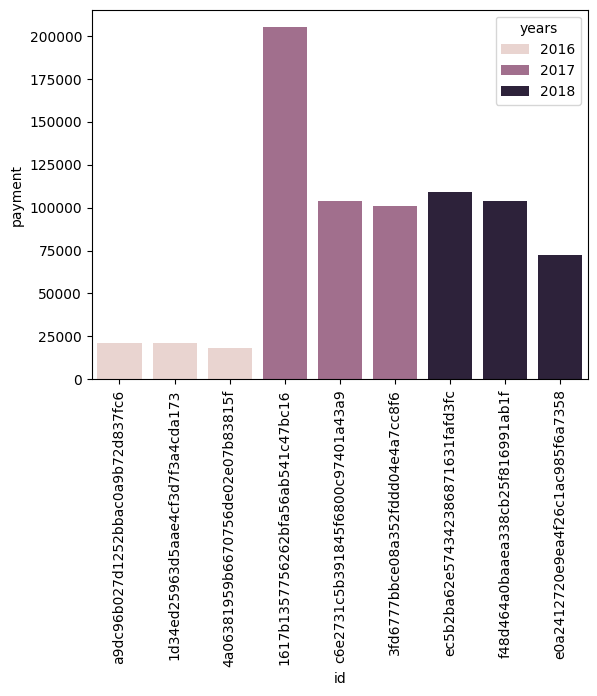

In [16]:
query="""select years , customer_id , payment , d_rank from 
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments
on payments.order_id=orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a 
where d_rank <=3"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["years" , "id" , "payment" , "rank"])
sns.barplot(x="id" , y="payment" , data=df , hue="years")
plt.xticks(rotation=90)
plt.show()